In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

plt.style.use(["fivethirtyeight"])

## Exploration
Explore the data, searching for missing data, outliers.
Quick exploratory data analysis (EDA)

In [2]:
training_data_df = pd.read_csv("data/training_set_features.csv", encoding="utf-8")

In [3]:
print("Dataset Shape:", training_data_df.shape)

Dataset Shape: (26707, 36)


In [4]:
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- Thanks to the shape we know that we have 26707 entries in training_data_df and 36 variables (columns).
- Thanks to info() we know that for some columns their is missing data.

In [5]:
missing_values = training_data_df.isnull().sum()
num_columns_with_nulls = len(missing_values[missing_values != 0])
print(f"There are {num_columns_with_nulls} columns with null values in the dataset.")

missing_values[missing_values != 0]

There are 30 columns with null values in the dataset.


h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

In [6]:
# Calculate the percentage of missing values per feature
missing_percentage = missing_values[missing_values != 0] / training_data_df.shape[0] * 100
missing_percentage.sort_values(inplace=True, ascending=False)
print("Percentages of missing values per feature:\n")
print(round(missing_percentage, 2))

Percentages of missing values per feature:

employment_occupation          50.44
employment_industry            49.91
health_insurance               45.96
income_poverty                 16.56
doctor_recc_seasonal            8.09
doctor_recc_h1n1                8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_seas_sick_from_vacc     2.01
opinion_seas_risk               1.92
opinion_seas_vacc_effective     1.73
opinion_h1n1_sick_from_vacc     1.48
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
household_children              0.93
household_adults                0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
h1n1_knowledge                  0.43
h1n1_concern                    0.34
behavioral_large_gatherings    

- The columns 'employment_industry', 'employment_occupation' and 'health_insurance' have more than 45% of null values. 

In [7]:
# Print the columns that have more than 2 uniques values (non binary) so those a categorical value or continuous value. Based on the number of values I think this is only categorical columns for the moment.

unique_value_counts = training_data_df.nunique()
presume_non_binary_cat_feature = unique_value_counts[unique_value_counts > 2].sort_values()


print(f"The number of non-binary categorical values: {len(presume_non_binary_cat_feature)-1} except 'respondent_id'")
unique_value_counts.sort_values()

The number of non-binary categorical values: 19 except 'respondent_id'


behavioral_antiviral_meds          2
behavioral_wash_hands              2
behavioral_face_mask               2
behavioral_avoidance               2
behavioral_large_gatherings        2
doctor_recc_h1n1                   2
behavioral_touch_face              2
behavioral_outside_home            2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
doctor_recc_seasonal               2
health_insurance                   2
sex                                2
rent_or_own                        2
marital_status                     2
employment_status                  3
census_msa                         3
h1n1_knowledge                     3
income_poverty                     3
education                          4
h1n1_concern                       4
race                               4
household_adults                   4
household_children                 4
opinion_seas_sick_from_vacc        5
opinion_h1n1_risk                  5
o

### Univariate Analysis
I am going to plot distributions for individual categorical features to help me understand their value counts.

C:\Users\Django\AppData\Local\Temp\ipykernel_34508\2948210091.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


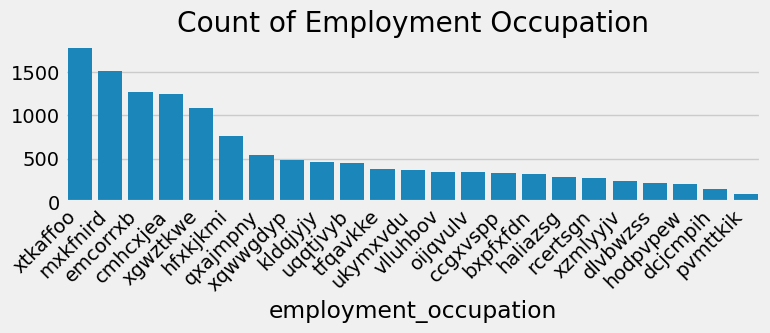

In [8]:
employment_occupation_counts = training_data_df["employment_occupation"].value_counts()
plt.figure(figsize=(8, 2))
plt.title("Count of Employment Occupation")
ax = sns.barplot(x=employment_occupation_counts.index, y=employment_occupation_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [9]:
total_rows = training_data_df.shape[0]

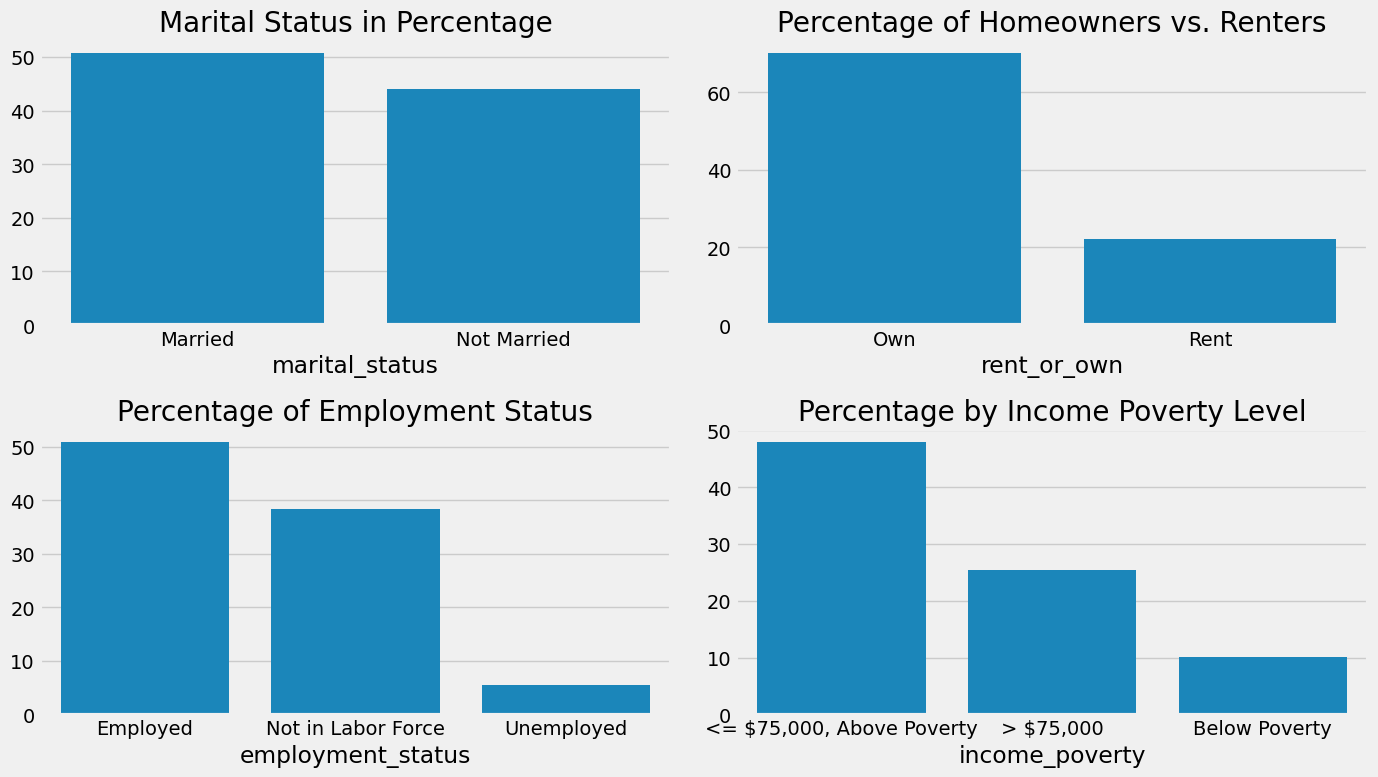

In [10]:
# Calculate percentages for various features
marital_status_percentage = training_data_df["marital_status"].value_counts() / total_rows * 100
rent_or_own_percentage = training_data_df["rent_or_own"].value_counts() / total_rows * 100
employment_status_percentage = training_data_df["employment_status"].value_counts() / total_rows * 100
income_poverty_percentage = training_data_df["income_poverty"].value_counts() / total_rows * 100


fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.barplot(x=marital_status_percentage.index, y=marital_status_percentage.values, ax=axes[0][0])
axes[0][0].set_title("Marital Status in Percentage")

sns.barplot(x=rent_or_own_percentage.index, y=rent_or_own_percentage.values, ax=axes[0][1])
axes[0][1].set_title("Percentage of Homeowners vs. Renters")

sns.barplot(x=employment_status_percentage.index, y=employment_status_percentage.values, ax=axes[1][0])
axes[1][0].set_title("Percentage of Employment Status")

sns.barplot(x=income_poverty_percentage.index, y=income_poverty_percentage.values, ax=axes[1][1])
axes[1][1].set_title("Percentage by Income Poverty Level")

plt.tight_layout()
plt.show()

C:\Users\Django\AppData\Local\Temp\ipykernel_34508\4226186277.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No", "Yes"])


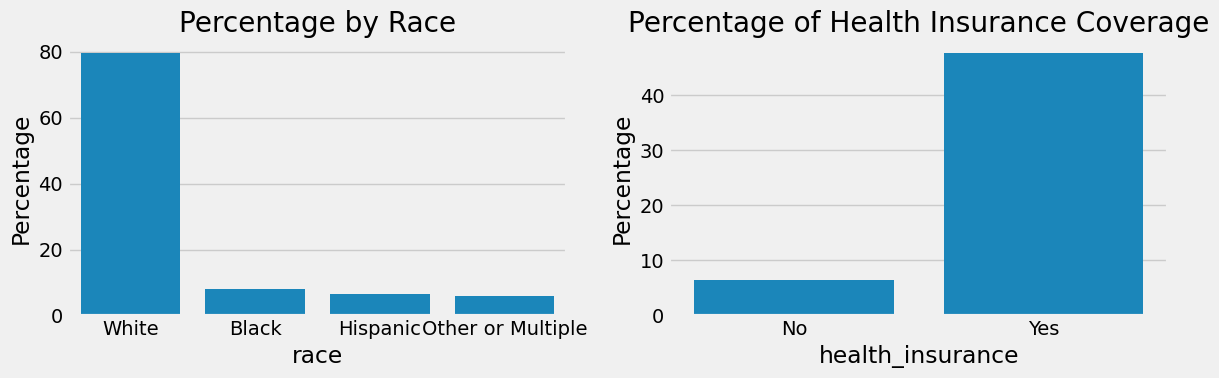

In [11]:
race_percentage = training_data_df["race"].value_counts() / total_rows * 100
health_insurance_percentage = training_data_df["health_insurance"].value_counts() / total_rows * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=race_percentage.index, y=race_percentage.values, ax=axes[0])
axes[0].set_title("Percentage by Race")
axes[0].set_ylabel("Percentage")

sns.barplot(x=health_insurance_percentage.index, y=health_insurance_percentage.values, ax=axes[1])
axes[1].set_title("Percentage of Health Insurance Coverage")
axes[1].set_ylabel("Percentage")
axes[1].set_xticklabels(["No", "Yes"])

plt.tight_layout()
plt.show()

### Bivariate Analysis
This section was deemed unnecessary for categorical and binary features based on initial analysis, as visualizations would result in XOR-like or highly similar patterns without providing additional insights.


### Multivariate Analysis/ Correlation

Correlation between different variables (columns). The correlation can only be computed between non categorical features so I first need to transform the features.

In [12]:
presume_categorical_feature_list = unique_value_counts.index.to_list()
presume_categorical_feature_list.remove("respondent_id")
# presume_categorical_feature_list.remove("employment_industry")
# presume_categorical_feature_list.remove("employment_occupation")
len(presume_categorical_feature_list)

35

- For the moment I will keep "employment_industry" and "employment_occupation" but I believe I should remove them

In [13]:
dropping_features_list = [
    "respondent_id",
]  # "employment_industry", "employment_occupation"

- Feature transformations, converting categorical (nominal and ordinal) features to numerical features

In [14]:
nominal_features = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status", "hhs_geo_region", "census_msa", "employment_industry", "employment_occupation"]
ordinal_features = ["income_poverty"]

In [15]:
# Transform nominal features to one-hot encoded variables for correlation analysis
correlation_df = pd.get_dummies(data=training_data_df, columns=nominal_features)

# Transform ordinal features using ordinal encoding
ordinal_encoder = OrdinalEncoder()
correlation_df[ordinal_features] = ordinal_encoder.fit_transform(training_data_df[ordinal_features])

# Dropping features
correlation_df.drop(dropping_features_list, axis="columns", inplace=True)

In [16]:
correlation_df.shape

(26707, 103)

In [17]:
correlation_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [18]:
# Calculate the correlation matrix for the dataset
correlation_matrix = correlation_df.corr()

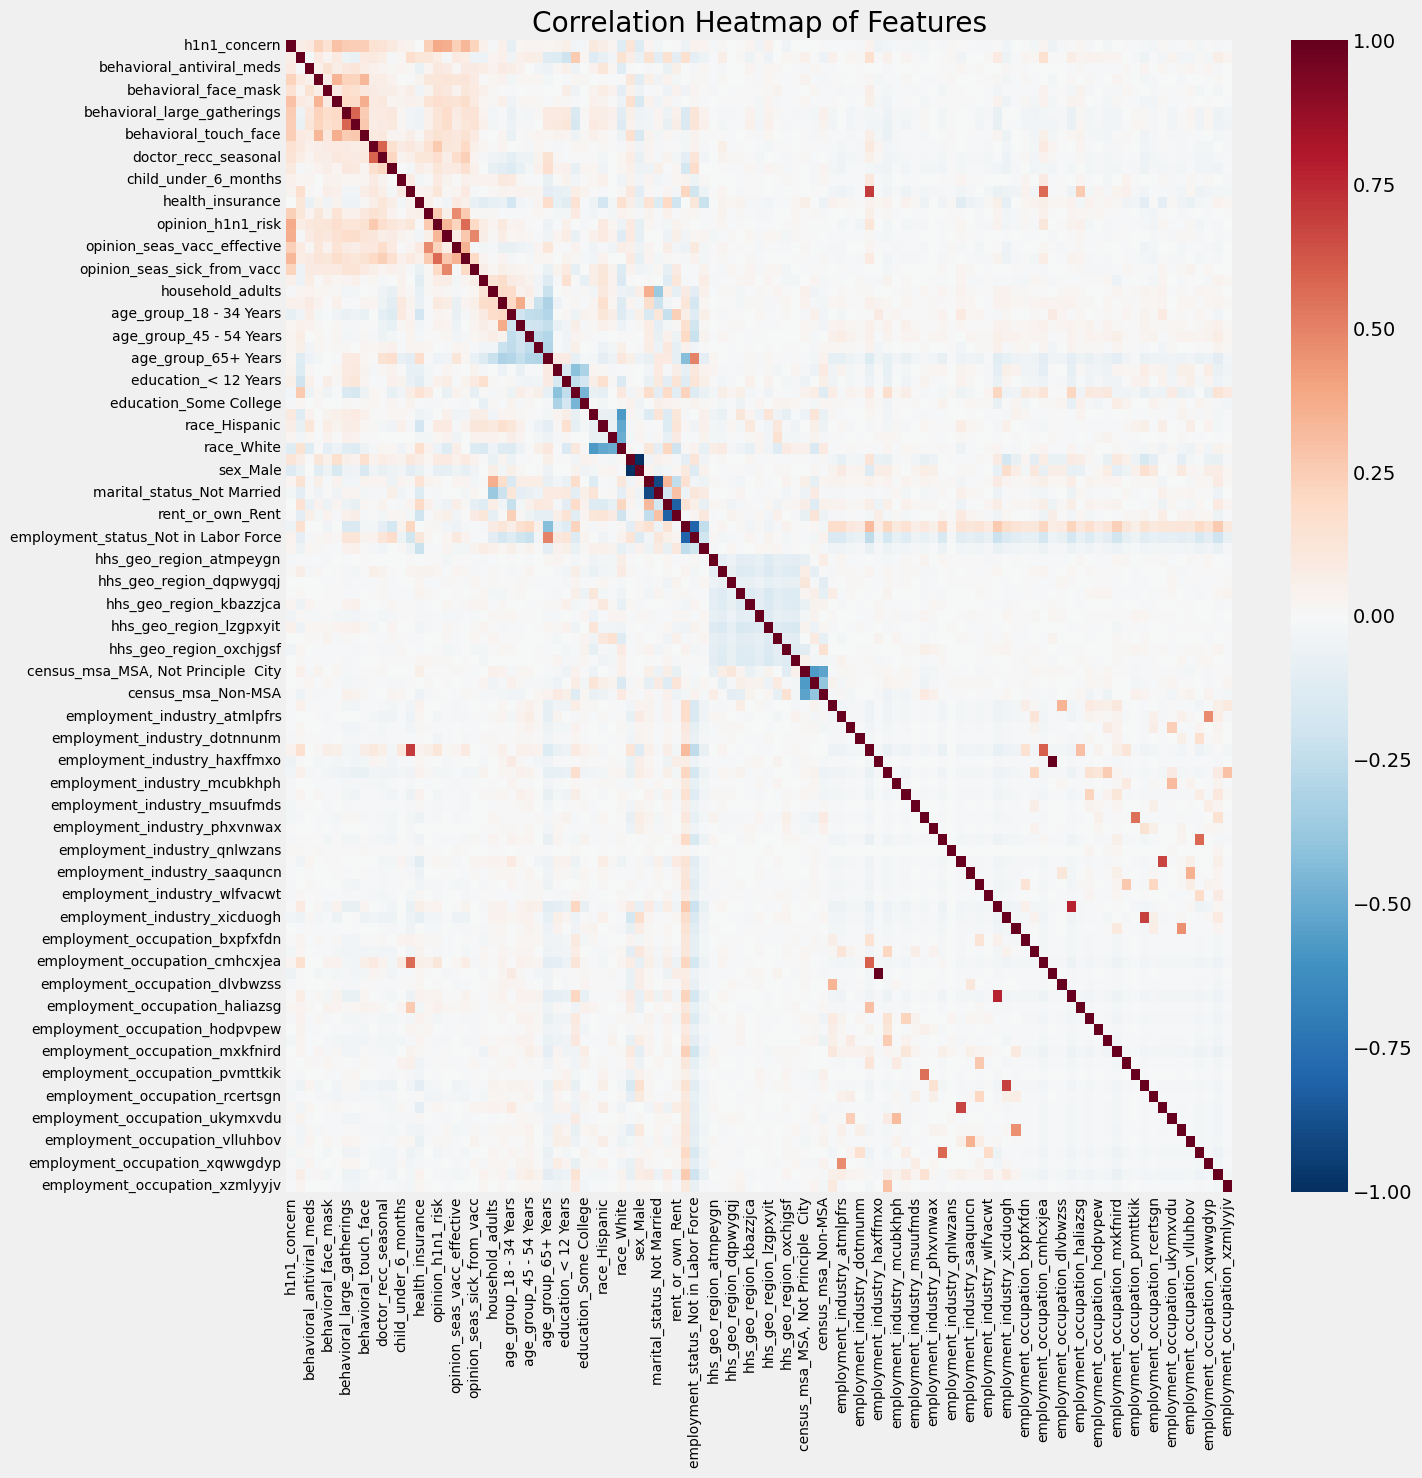

In [19]:
# Plotting the Correlation Heatmap
plt.figure(figsize=(15, 15))
ax = sns.heatmap(correlation_matrix, cmap="RdBu_r", annot=False)
ax.tick_params(axis="both", labelsize=10)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


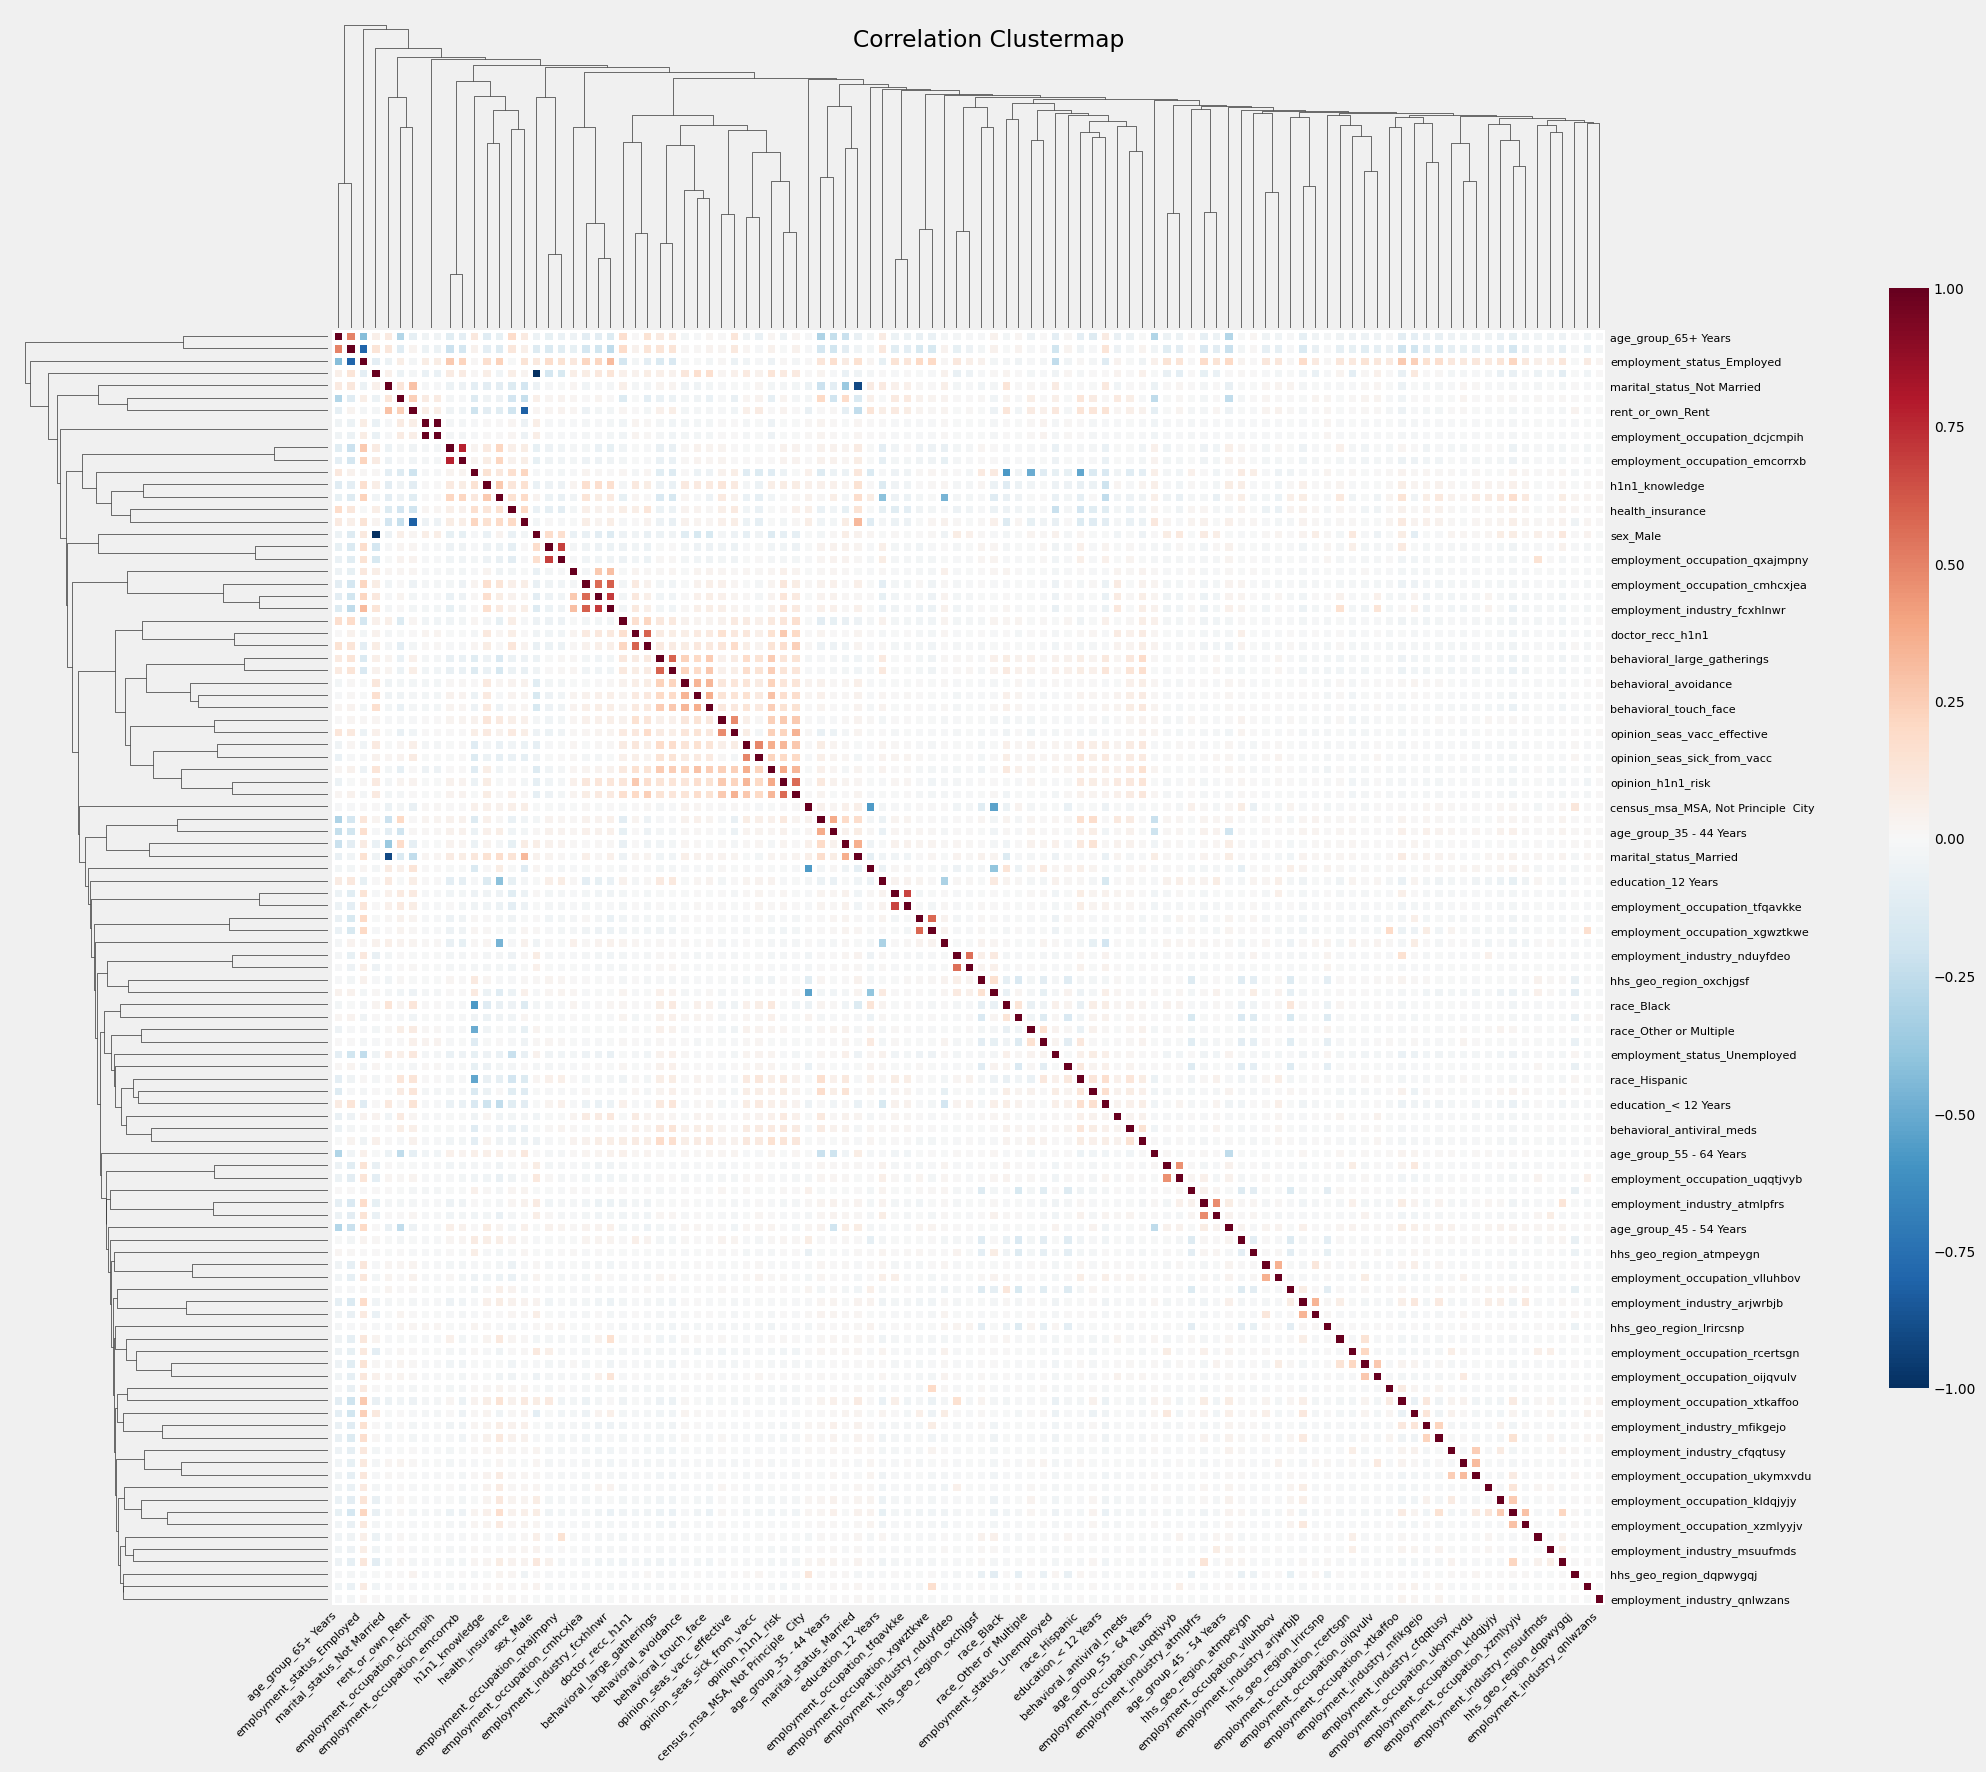

In [20]:
# Plotting Clustermap to visualize correlation clusters
cluster_map = sns.clustermap(correlation_matrix, figsize=(20, 20), cmap="RdBu_r", linewidths=2.5, cbar_kws={"shrink": 0.8})
# Customizing clustermap axis labels and colorbar
cluster_map.ax_heatmap.set_xticklabels(cluster_map.ax_heatmap.get_xticklabels(), fontsize=8, rotation=45, ha="right")
cluster_map.ax_heatmap.set_yticklabels(cluster_map.ax_heatmap.get_yticklabels(), fontsize=8)
cluster_map.cax.set_position([0.95, 0.3, 0.02, 0.55])
cluster_map.cax.tick_params(labelsize=10)
cluster_map.figure.suptitle("Correlation Clustermap")

plt.show()

In [21]:
# Identify correlated features based on a threshold
correlation_threshold = 0.5
correlated_features = []

# Iterating over the correlation matrix to find feature pairs above threshold
for i, j in zip(*np.where(np.abs(correlation_matrix) > correlation_threshold)):
    if i != j and i < j:  # Exclude self-correlation and duplicate pairs
        feature_1 = correlation_matrix.columns[i]
        feature_2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        correlated_features.append((feature_1, feature_2, correlation_value))


features_correlation_df = pd.DataFrame(correlated_features, columns=["Feature1", "Feature2", "Correlation"])

features_correlation_df

,Feature1,Feature2,Correlation
0,behavioral_large_gatherings,behavioral_outside_home,0.584085
1,doctor_recc_h1n1,doctor_recc_seasonal,0.591868
2,health_worker,employment_industry_fcxhlnwr,0.695702
3,health_worker,employment_occupation_cmhcxjea,0.566283
4,opinion_h1n1_risk,opinion_seas_risk,0.564208
5,race_Black,race_White,-0.577294
6,race_Hispanic,race_White,-0.521664
7,sex_Female,sex_Male,-1.000000
8,marital_status_Married,marital_status_Not Married,-0.899399
9,rent_or_own_Own,rent_or_own_Rent,-0.818975


- Some those are the feature that or the most correlated based on a threshold of 0.5.
- Usually a correlation score bigger than 0.5 is considered important. 
- Some of these pairs are useless for example sex_Female is correlated to sex_Male which make sense if you are a Male you cannot be a Female. So having both a the same time doesn't make sense.
- Thus the features on the columns Features 2 will be removed.
- In this case 19 features will be removed

In [22]:
# Drop redundant features from the DataFrame based on correlation analysis
features_to_remove = features_correlation_df["Feature2"]
cleaned_data_df = correlation_df.drop(labels=features_to_remove, axis="columns")
selected_features = cleaned_data_df.columns.tolist()

In [23]:
# Add 'respondent_id' back to cleaned data
cleaned_data_df["respondent_id"] = training_data_df["respondent_id"]
cleaned_data_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,respondent_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1


In [24]:
cleaned_data_df.shape

(26707, 86)

## Data Cleaning and Preprocessing 

### Handling nulls
#### Method 1: Removing Nulls


In [25]:
# Method 1: Removing Nulls
data_df_no_nulls = cleaned_data_df.dropna()
rows_dropped = cleaned_data_df.shape[0] - data_df_no_nulls.shape[0]
print(f"Rows dropped: {rows_dropped}")
print(f"Shape before removing nulls: {cleaned_data_df.shape}")
print(f"Shape after removing nulls: {data_df_no_nulls.shape}")

Rows dropped: 14707
Shape before removing nulls: (26707, 86)
Shape after removing nulls: (12000, 86)


#### Method 2: Imputing Nulls Using Mode (Most Frequent Value)

In [26]:
data_df_mode_imputed = training_data_df.copy()
for feature in data_df_mode_imputed.columns:
    data_df_mode_imputed[feature] = data_df_mode_imputed[feature].fillna(data_df_mode_imputed[feature].mode()[0])

In [27]:
data_df_mode_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [28]:
data_df_mode_imputed.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [29]:
# Check if there are any missing values left
print(data_df_mode_imputed.shape)

(26707, 36)


#### Method 3: Imputing Nulls Using K-Nearest Neighbor (KNN) Imputer
Using K-Nearest Neighbor algorithms to fill missing data. it will impute the missing values with the mean and the median of nearest neighbors data points.

source :https://stackoverflow.com/questions/57775064/how-to-implement-knn-to-impute-categorical-features-in-a-sklearn-pipeline

In [30]:
# List of Categorical and Binary features
categorical_features_of_interest_list = [
    "h1n1_concern",
    "h1n1_knowledge",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "age_group",
    "education",
    "race",
    "sex",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "employment_status",
    "hhs_geo_region",
    "census_msa",
    "household_adults",
    "household_children",
    "employment_industry",
    "employment_occupation",
]

In [31]:
binary_feature_of_interest = [feature for feature in missing_percentage.index if feature not in categorical_features_of_interest_list]
binary_feature_of_interest

['health_insurance',
 'doctor_recc_seasonal',
 'doctor_recc_h1n1',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'behavioral_avoidance',
 'behavioral_touch_face',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_antiviral_meds',
 'behavioral_wash_hands',
 'behavioral_face_mask']

In [32]:
# Those a real categorical feature that need encoding
age_group_index = categorical_features_of_interest_list.index("age_group")
categorical_features_to_encode_list = categorical_features_of_interest_list[age_group_index:]

In [33]:
data_df_knn_imputed = training_data_df.copy()

In [34]:
data_df_knn_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [35]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Label encode categorical features for KNN compatibility
label_encoder_dict: dict[str:LabelEncoder] = dict()

for cat_feature in categorical_features_to_encode_list:
    # using LabelEncoder to have number instead of text for categorical features while preserving null
    series = data_df_knn_imputed[cat_feature]
    label_encoder = LabelEncoder()
    data_df_knn_imputed[cat_feature] = pd.Series(label_encoder.fit_transform(series[series.notnull()]), index=series[series.notnull()].index)
    label_encoder_dict[cat_feature] = label_encoder

# KNN imputer
knn_imputer = KNNImputer(n_neighbors=1)

data_df_knn_imputed[categorical_features_of_interest_list + binary_feature_of_interest] = knn_imputer.fit_transform(
    data_df_knn_imputed[categorical_features_of_interest_list + binary_feature_of_interest]
)

In [36]:
data_df_knn_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,10.0,10.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,19.0


In [37]:
# Re-assign the imputed data back to the DataFrame and round categorical features
for cat_feature in categorical_features_to_encode_list:
    data_df_knn_imputed[cat_feature] = data_df_knn_imputed[cat_feature].round().astype(int)

In [38]:
data_df_knn_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,0,0,10,10
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,0,0,12,19


In [39]:
for cat_feature in categorical_features_to_encode_list:  # using LabelEncoder to have the text back
    print(f"Currently processing feature: {cat_feature}")
    data_df_knn_imputed[cat_feature] = label_encoder_dict[cat_feature].inverse_transform(data_df_knn_imputed[cat_feature])

Currently processing feature: age_group
Currently processing feature: education
Currently processing feature: race
Currently processing feature: sex
Currently processing feature: income_poverty
Currently processing feature: marital_status
Currently processing feature: rent_or_own
Currently processing feature: employment_status
Currently processing feature: hhs_geo_region
Currently processing feature: census_msa
Currently processing feature: household_adults
Currently processing feature: household_children
Currently processing feature: employment_industry
Currently processing feature: employment_occupation


In [40]:
data_df_knn_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,nduyfdeo,mxkfnird
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [41]:
for cat_feature in categorical_features_to_encode_list:  # using LabelEncoder to have the text back
    print(f"Currently processing feature: {cat_feature}")
    data_df_knn_imputed[cat_feature] = label_encoder_dict[cat_feature].transform(data_df_knn_imputed[cat_feature])

Currently processing feature: age_group
Currently processing feature: education
Currently processing feature: race
Currently processing feature: sex
Currently processing feature: income_poverty
Currently processing feature: marital_status
Currently processing feature: rent_or_own
Currently processing feature: employment_status
Currently processing feature: hhs_geo_region
Currently processing feature: census_msa
Currently processing feature: household_adults
Currently processing feature: household_children
Currently processing feature: employment_industry
Currently processing feature: employment_occupation


In [42]:
data_df_knn_imputed.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,0,0,10,10
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,0,0,12,19


In [43]:
# Check for remaining null values after KNN Imputation
nulls_df4 = data_df_knn_imputed.isnull().sum()
print("There are %d columns with nulls in the dataset" % len(nulls_df4[nulls_df4 != 0]))
nulls_df4[nulls_df4 != 0]

There are 0 columns with nulls in the dataset


Series([], dtype: int64)

### Feature Engineering and Selection
- Part of the feature selection was done with removing redundant features using correlation score.
- Feature Importance Evaluation: Computes Pearson correlation of selected features with target labels (H1N1 and seasonal vaccines) and displays a heatmap to visualize their importance.

source: https://www.geeksforgeeks.org/what-is-feature-engineering/

#### Feature Importance

In [44]:
training_data_label_df = pd.read_csv("data/training_set_labels.csv", encoding="utf-8")

In [45]:
training_data_label_df.shape

(26707, 3)

In [46]:
data_df_no_nulls = data_df_no_nulls.set_index("respondent_id")

In [47]:
data_df_no_nulls_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_no_nulls.index)]
data_df_no_nulls_labels.shape
print(f"Data with removed nulls labels shape: {data_df_no_nulls_labels.shape}")

Data with removed nulls labels shape: (12000, 3)


In [48]:
data_df_mode_imputed = data_df_mode_imputed.set_index("respondent_id")

In [49]:
data_df_mode_imputed_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_mode_imputed.index)]
print(f"Data with mode imputed labels shape: {data_df_mode_imputed_labels.shape}")

Data with mode imputed labels shape: (26707, 3)


In [50]:
data_df_knn_imputed = data_df_knn_imputed.set_index("respondent_id")

In [51]:
data_df_knn_imputed_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_knn_imputed.index)]
print(f"Data with knn imputed labels shape: {data_df_knn_imputed_labels.shape}")

Data with knn imputed labels shape: (26707, 3)


In [52]:
from scipy.stats import pearsonr

In [53]:
data_df_no_nulls_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [54]:
correlations = {"h1n1_vaccine": {}, "seasonal_vaccine": {}}

for column in selected_features:
    # Compute Pearson correlation between each feature and the labels
    feature_data = data_df_no_nulls[column]
    corr_h1n1, _ = pearsonr(feature_data, data_df_no_nulls_labels["h1n1_vaccine"])
    correlations["h1n1_vaccine"][column] = corr_h1n1

    corr_seasonal, _ = pearsonr(feature_data, data_df_no_nulls_labels["seasonal_vaccine"])
    correlations["seasonal_vaccine"][column] = corr_seasonal

correlations = pd.DataFrame(correlations)

print(correlations)

                                h1n1_vaccine  seasonal_vaccine
h1n1_concern                        0.186720          0.171225
h1n1_knowledge                      0.160029          0.141805
behavioral_antiviral_meds           0.020564         -0.003725
behavioral_avoidance                0.059155          0.073242
behavioral_face_mask                0.071570          0.048011
...                                      ...               ...
employment_occupation_uqqtjvyb     -0.040570         -0.065755
employment_occupation_vlluhbov     -0.015632         -0.030632
employment_occupation_xqwwgdyp     -0.035899         -0.037202
employment_occupation_xtkaffoo      0.004250         -0.016015
employment_occupation_xzmlyyjv      0.003504         -0.003206

[85 rows x 2 columns]


In [55]:
correlations.loc[correlations.idxmax()]

,h1n1_vaccine,seasonal_vaccine
opinion_h1n1_risk,0.424593,0.259997
opinion_seas_vacc_effective,0.226642,0.381784


In [56]:
correlations.loc[correlations.idxmin()]

,h1n1_vaccine,seasonal_vaccine
race_Black,-0.069358,-0.078929
age_group_18 - 34 Years,-0.054183,-0.184491


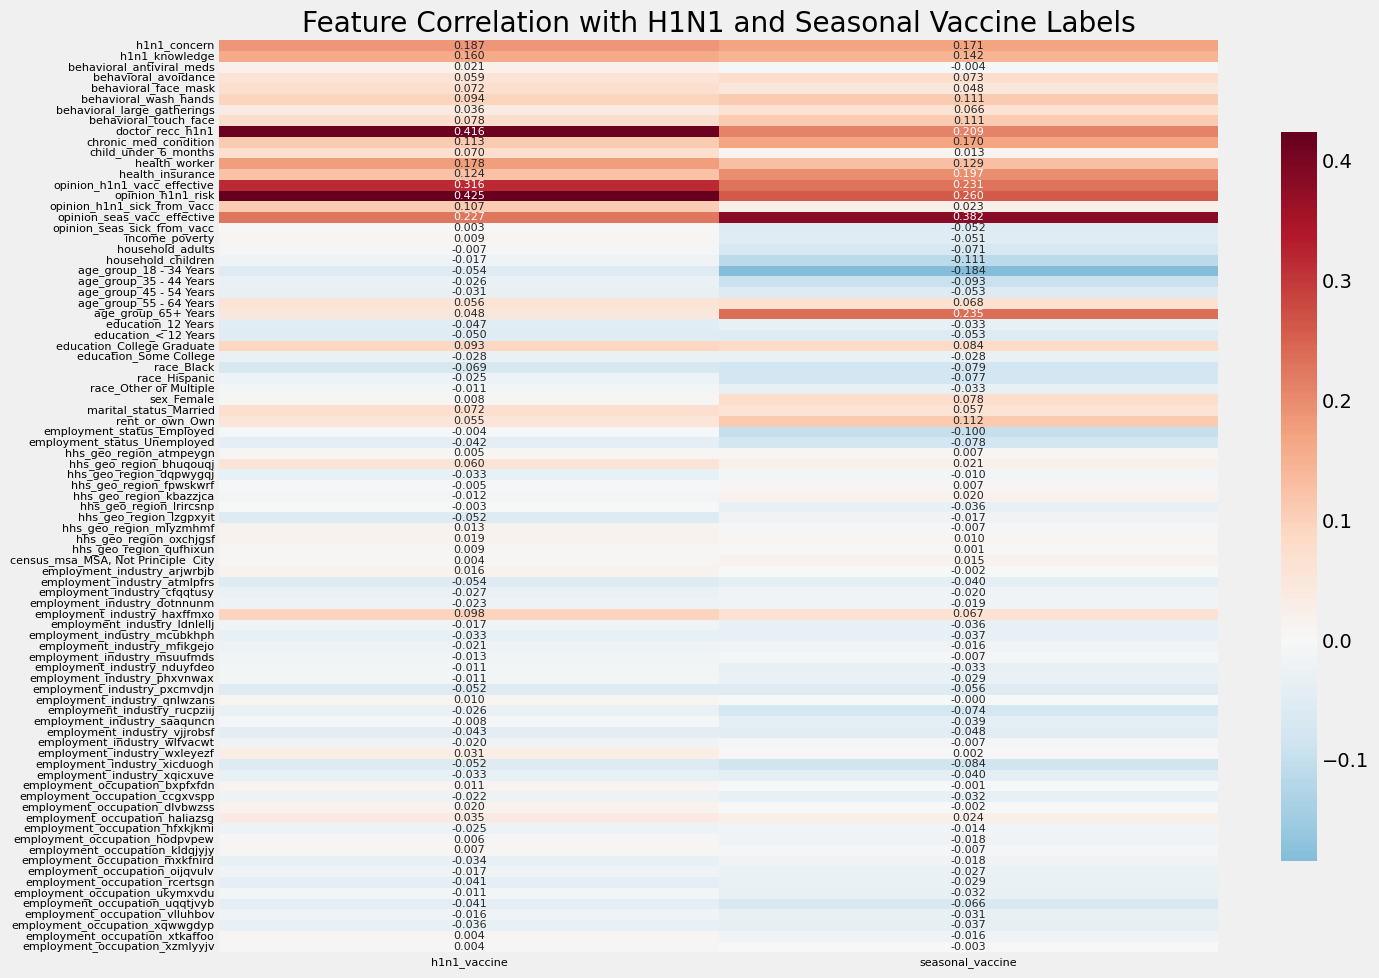

In [57]:
%matplotlib inline
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlations, cmap="RdBu_r", center=0, annot=True, fmt=".3f", annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, xticklabels=correlations.columns, yticklabels=correlations.index)
ax.tick_params("both", labelsize=8)
plt.title("Feature Correlation with H1N1 and Seasonal Vaccine Labels")
plt.tight_layout()
plt.show()

- No strong correlation between features and labels ( > 0.5) so I will not remove any features

In [59]:
def preprocessing_with_correlated_features_removal(data_df: pd.DataFrame, ordinal_encoder, features_list_to_drop=features_correlation_df["Feature2"]):
    nominal_feature_list = [
        "age_group",
        "education",
        "race",
        "sex",
        "marital_status",
        "rent_or_own",
        "employment_status",
        "hhs_geo_region",
        "census_msa",
        "employment_industry",
        "employment_occupation",
    ]
    ordinal_feature_list = ["income_poverty"]
    # Nominal feature transformations
    data_df = pd.get_dummies(data=data_df, columns=nominal_feature_list)

    # Ordinal feature transformations
    data_df[ordinal_feature_list] = ordinal_encoder.transform(data_df[ordinal_feature_list])

    # Dropping features
    data_df.drop(features_list_to_drop, axis="columns", inplace=True, errors="ignore")

    return data_df

In [60]:
def preprocessing_with_knn_imputer(df, knn_imputer, label_encoder_dict, categorical_features_list, binary_features_list):
    """This function prepares categorical features using label encoding, applies KNN imputation, and reverts encoded categorical features to integer format.

    Args:
        df (DataFrame): The dataframe to preprocess
        knn_imputer (_type_): the knn imputer
        label_encoder_dict (_type_): The label encoder dictionary used to encode categorical features
        categorical_features_list (_type_): The list of categorical features
        binary_features_list (_type_): The list of binary features

    Returns:
        DataFrame: The preprocessed dataframe
    """
    for cat_feature, label_encoder in label_encoder_dict.items():
        # Use LabelEncoder to convert categorical text to numbers
        series = df[cat_feature]
        df[cat_feature] = pd.Series(label_encoder.transform(series[series.notnull()]), index=series[series.notnull()].index)

    # Apply KNN Imputer
    df[categorical_features_list + binary_features_list] = knn_imputer.fit_transform(df[categorical_features_list + binary_features_list])

    # Convert encoded categorical features back to integer format
    for cat_feature in categorical_features_list:
        df[cat_feature] = df[cat_feature].round().astype(int)

    return df

#### Feature Reduction

#####  Principal Component Analysis (PCA)

In [61]:
from sklearn.decomposition import PCA


num_principal_components = 41
pca = PCA(n_components=num_principal_components)
pca.fit(data_df_no_nulls[selected_features])


feature_pca = pca.transform(data_df_no_nulls[selected_features])

data_pca = pd.DataFrame(feature_pca, columns=[f"PC{i}" for i in range(1, num_principal_components + 1)], index=data_df_no_nulls.index)

In [62]:
data_df_no_nulls.shape

(12000, 85)

## Data Spliting and Modeling 

- At this point, there are 4 primary datasets:
	- data_df_no_nulls: Contains features without missing values and reduced via correlation-based removal.
	- data_pca: Contains PCA-transformed features.
	- data_df_knn_imputed: Contains features with missing values imputed by KNN imputer
	- data_df_mode_imputed: Contains features with missing values imputed by Mode

- Prediction Goal: 
-  **how likely individuals are to receive their H1N1 and seasonal flu vaccines**
- Labels (binary: 0 = No, 1 = Yes):
	- h1n1_vaccine - Whether respondent received H1N1 flu vaccine. (binary)
	- seasonal_vaccine - Whether respondent received seasonal flu vaccine. (binary)

BSince this is a multilabel classification problem, separate models will be built for each label.

For the models:
- Logistic regression

### Logistic regression with reduced feature (not PCA)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Model with data nulls removed
Data with dropped features based on correlation only no other feature selection

In [64]:
data_df_no_nulls_labels = data_df_no_nulls_labels.set_index("respondent_id")

In [65]:
seed = 2024
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(data_df_no_nulls, data_df_no_nulls_labels, test_size=test_size, random_state=seed)

In [66]:
X_train.shape

(8400, 85)

In [67]:
X_test.shape

(3600, 85)

In [68]:
model_h1n1 = LogisticRegression()
model_seasonal = LogisticRegression()

# Train the models on each label
model_h1n1.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal.fit(X_train, y_train["seasonal_vaccine"])

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression()

In [69]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
def evaluate_logistic_regression(model_h1n1, model_seasonal, X_test, y_test):
    """function to evaluate models and print ROC AUC scores and classification reports"""
    
    # Predict probabilities for each label on the test set
    prob_h1n1 = model_h1n1.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for H1N1
    prob_seasonal = model_seasonal.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for Seasonal Vaccine

    # The ROC AUC scores
    roc_auc_h1n1 = roc_auc_score(y_test["h1n1_vaccine"], prob_h1n1)
    roc_auc_seasonal = roc_auc_score(y_test["seasonal_vaccine"], prob_seasonal)
    roc_auc_mean = (roc_auc_h1n1 + roc_auc_seasonal) / 2
    print("H1N1 Vaccine ROC AUC: {:.3f}".format(roc_auc_h1n1))
    print("Seasonal Vaccine ROC AUC: {:.3f}".format(roc_auc_seasonal))
    print("Mean ROC AUC: {:.3f}".format(roc_auc_mean))

    # Evaluate model performance for both labels
    print("Classification Report for H1N1:")
    print(classification_report(y_test["h1n1_vaccine"], model_h1n1.predict(X_test)))

    print("Classification Report for Seasonal Vaccine:")
    print(classification_report(y_test["seasonal_vaccine"], model_seasonal.predict(X_test)))


evaluate_logistic_regression(model_h1n1=model_h1n1, model_seasonal=model_seasonal, X_test=X_test, y_test=y_test)

H1N1 Vaccine ROC AUC: 0.856
Seasonal Vaccine ROC AUC: 0.822
Mean ROC AUC: 0.839
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2529
           1       0.73      0.59      0.65      1071

    accuracy                           0.81      3600
   macro avg       0.78      0.75      0.76      3600
weighted avg       0.81      0.81      0.81      3600

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1776
           1       0.75      0.75      0.75      1824

    accuracy                           0.75      3600
   macro avg       0.75      0.75      0.75      3600
weighted avg       0.75      0.75      0.75      3600



#### Model with data nulls imputed with mode
data_df_mode_imputed contains all the rows and NAN values were imputed using mode 

In [71]:
data_df_mode_imputed = preprocessing_with_correlated_features_removal(data_df_mode_imputed, ordinal_encoder=ordinal_encoder)

In [72]:
data_df_mode_imputed.shape

(26707, 85)

In [73]:
data_df_mode_imputed_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_mode_imputed.index)]
data_df_mode_imputed_labels.shape
print(f"Data3 labels shape: {data_df_mode_imputed_labels.shape}")

Data3 labels shape: (26707, 3)


In [ ]:
seed = 2024
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(data_df_mode_imputed, data_df_mode_imputed_labels, test_size=test_size, random_state=seed)
X_train.shape

(18694, 85)

In [75]:
model_h1n1_mode = LogisticRegression()
model_seasonal_mode = LogisticRegression()

# Train the models on each label
model_h1n1_mode.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_mode.fit(X_train, y_train["seasonal_vaccine"])

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression()

In [76]:
evaluate_logistic_regression(model_h1n1=model_h1n1_mode, model_seasonal=model_seasonal_mode, X_test=X_test, y_test=y_test)

H1N1 Vaccine ROC AUC: 0.830
Seasonal Vaccine ROC AUC: 0.817
Mean ROC AUC: 0.823
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6323
           1       0.67      0.41      0.51      1690

    accuracy                           0.83      8013
   macro avg       0.76      0.68      0.70      8013
weighted avg       0.82      0.83      0.82      8013

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4314
           1       0.73      0.71      0.72      3699

    accuracy                           0.74      8013
   macro avg       0.74      0.74      0.74      8013
weighted avg       0.74      0.74      0.74      8013



#### Model with data nulls imputed using KNN imputer
Data 4 contains all the rows and NAN values were imputed using KNN imputer of sklearn

In [77]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df_knn_imputed, data_df_knn_imputed_labels, test_size=test_size, random_state=seed)

In [78]:
X_train.shape

(21365, 35)

In [79]:
model_h1n1_knn = LogisticRegression()
model_seasonal_knn = LogisticRegression()

# Train the models on each label
model_h1n1_knn.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_knn.fit(X_train, y_train["seasonal_vaccine"])

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression()

In [80]:
evaluate_logistic_regression(model_h1n1=model_h1n1_knn, model_seasonal=model_seasonal_knn, X_test=X_test, y_test=y_test)

H1N1 Vaccine ROC AUC: 0.827
Seasonal Vaccine ROC AUC: 0.847
Mean ROC AUC: 0.837
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4208
           1       0.68      0.39      0.50      1134

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2857
           1       0.78      0.72      0.75      2485

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.77      5342



#### Logistic regression with PCA data

In [81]:
pca_data_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_no_nulls.index)]

In [82]:
pca_data_labels = pca_data_labels.set_index("respondent_id")

In [83]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_pca, pca_data_labels, test_size=test_size, random_state=seed)

In [84]:
model_h1n1_pca = LogisticRegression()
model_seasonal_pca = LogisticRegression()

# Train the models on each label
model_h1n1_pca.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_pca.fit(X_train, y_train["seasonal_vaccine"])

LogisticRegression()

In [85]:
# Predict probabilities for each label on the test set
prob_h1n1_pca = model_h1n1_pca.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for H1N1
prob_seasonal_pca = model_seasonal_pca.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for Seasonal Vaccine

print("H1N1 Vaccine Probabilities:", prob_h1n1_pca[:5])
print("Seasonal Vaccine Probabilities:", prob_seasonal_pca[:5])

# The ROC AUC scores
roc_auc_h1n1_pca = roc_auc_score(y_test["h1n1_vaccine"], prob_h1n1_pca)
roc_auc_seasonal_pca = roc_auc_score(y_test["seasonal_vaccine"], prob_seasonal_pca)
roc_auc_mean_pca = (roc_auc_h1n1_pca + roc_auc_seasonal_pca) / 2
print("H1N1 Vaccine ROC AUC: {:.3f}".format(roc_auc_h1n1_pca))
print("Seasonal Vaccine ROC AUC: {:.3f}".format(roc_auc_seasonal_pca))
print("Mean ROC AUC: {:.3f}".format(roc_auc_mean_pca))

# Evaluate model performance for both labels
print("Classification Report for H1N1:")
print(classification_report(y_test["h1n1_vaccine"], model_h1n1_pca.predict(X_test)))

print("Classification Report for Seasonal Vaccine:")
print(classification_report(y_test["seasonal_vaccine"], model_seasonal_pca.predict(X_test)))

H1N1 Vaccine Probabilities: [0.04046707 0.73323023 0.04391309 0.28667469 0.07521367]
Seasonal Vaccine Probabilities: [0.49289025 0.72824749 0.60635581 0.42313448 0.31990632]
H1N1 Vaccine ROC AUC: 0.853
Seasonal Vaccine ROC AUC: 0.814
Mean ROC AUC: 0.834
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1679
           1       0.73      0.59      0.65       721

    accuracy                           0.81      2400
   macro avg       0.79      0.75      0.76      2400
weighted avg       0.81      0.81      0.81      2400

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1164
           1       0.76      0.74      0.75      1236

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400



#### Submission of model nulls removed

In [86]:
def make_submission_format(
    model_h1n1,
    model_seasonal,
    X,
):
    prob_h1n1 = model_h1n1.predict_proba(X)[:, 1]
    prob_seasonal = model_seasonal.predict_proba(X)[:, 1]
    submission_df = pd.DataFrame({"respondent_id": X.index, "h1n1_vaccine": prob_h1n1, "seasonal_vaccine": prob_seasonal})
    return submission_df

In [87]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")

In [88]:
submission_df.shape

(26708, 35)

In [ ]:
submission_df = preprocessing_with_correlated_features_removal(submission_df, ordinal_encoder=ordinal_encoder)
submission_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [90]:
submission_df.shape

(26708, 85)

In [91]:
missing_data = submission_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = (missing_data / len(submission_df)) * 100
print(missing_data)
print(missing_percentage)

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_sick_from_vacc      521
income_poverty                  4497
household_adults                 225
household_children               225
dtype: int64
h1n1_concern                    0.318257
h1n1_knowledge                  0.456792
behavioral_antiviral_meds       0.295792
behavioral_avoidance            0.797514
behavioral_face_mask            0.071140
behav

In [92]:
submission_df.shape

(26708, 85)

In [ ]:
for feature in submission_df.columns:
    submission_df[feature] = submission_df[feature].fillna(submission_df[feature].mode()[0])

In [94]:
submission_df.isna().any().any()

np.False_

In [95]:
submission_df.shape

(26708, 85)

In [ ]:
submission_data = make_submission_format(model_h1n1, model_seasonal, submission_df)

In [97]:
submission_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.060162,0.462687
1,26708,0.032918,0.060011
2,26709,0.686732,0.769620
3,26710,0.541607,0.759396
4,26711,0.138362,0.426016


In [ ]:
submission_data.to_csv("data/submission_data.csv", index=False, encoding="utf-8")

#### Submission of model using nulls imputed with mode

In [99]:
submission_df3 = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df3 = submission_df3.set_index("respondent_id")

In [100]:
submission_df3.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp


In [102]:
for feature in submission_df3.columns:
    submission_df3[feature] = submission_df3[feature].fillna(submission_df3[feature].mode()[0])


enc_sub = OrdinalEncoder()
enc_sub.fit(submission_df3[ordinal_features])

submission_data3 = preprocessing_with_correlated_features_removal(submission_df3, ordinal_encoder=enc_sub, features_list_to_drop=features_correlation_df["Feature2"])

In [103]:
submission_data3.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [104]:
submission_data3 = make_submission_format(model_h1n1_mode, model_seasonal_mode, submission_data3)

In [105]:
submission_data3.to_csv("data/submission_data3.csv", index=False, encoding="utf-8")

#### Submission of model using nulls imputed with KNN

In [106]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")

In [107]:
submission_data4 = preprocessing_with_knn_imputer(submission_df, knn_imputer, label_encoder_dict, categorical_features_of_interest_list, binary_feature_of_interest)

In [108]:
submission_data4.shape

(26708, 35)

In [109]:
submission_data4 = make_submission_format(model_h1n1_knn, model_seasonal_knn, submission_data4)

In [110]:
submission_data4.head(2)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.087672,0.254226
1,26708,0.042074,0.045885


In [111]:
submission_data4.to_csv("data/submission_data4.csv", index=False, encoding="utf-8")

#### Submission of model using PCA data

In [112]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")

In [113]:
submission_df = preprocessing_with_correlated_features_removal(submission_df, ordinal_encoder=ordinal_encoder)
submission_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [114]:
for feature in submission_df.columns:
    submission_df[feature] = submission_df[feature].fillna(submission_df[feature].mode()[0])

In [115]:
# n_components = 20
# pca = PCA(n_components=n_components)  # number of principal component
# pca.fit(data_df2[features_list])
submission_feature_pca = pca.transform(submission_df[selected_features])
submission_df_pca = pd.DataFrame(submission_feature_pca, columns=[f"PC{i}" for i in range(1, num_principal_components + 1)], index=submission_df.index)

In [116]:
submission_data = make_submission_format(model_h1n1_pca, model_seasonal_pca, submission_df_pca)

In [117]:
submission_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.097248,0.427151
1,26708,0.035492,0.051275
2,26709,0.735700,0.845816
3,26710,0.552786,0.782380
4,26711,0.156794,0.374543


In [118]:
submission_data.to_csv("data/submission_data_pca.csv", index=False, encoding="utf-8")

### Random Forests Model
#### Random Forests Model with data nulls removed

In [164]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df_no_nulls, data_df_no_nulls_labels, test_size=test_size, random_state=seed)

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
h1n1_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
seasonal_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)

In [166]:
y_train.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [167]:
h1n1_rf_classifier.fit(X_train, y_train["h1n1_vaccine"])
seasonal_rf_classifier.fit(X_train, y_train["seasonal_vaccine"])

RandomForestClassifier(random_state=2024)

In [168]:
evaluate_logistic_regression(h1n1_rf_classifier, seasonal_rf_classifier, X_test, y_test)

H1N1 Vaccine ROC AUC: 0.851
Seasonal Vaccine ROC AUC: 0.814
Mean ROC AUC: 0.833
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1679
           1       0.74      0.55      0.64       721

    accuracy                           0.81      2400
   macro avg       0.79      0.74      0.75      2400
weighted avg       0.80      0.81      0.80      2400

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1164
           1       0.77      0.72      0.74      1236

    accuracy                           0.74      2400
   macro avg       0.75      0.75      0.74      2400
weighted avg       0.75      0.74      0.74      2400



In [155]:
def evaluate_rf_classifier(model_h1n1, model_seasonal, X_test, y_test):
    """function to evaluate models and print ROC AUC scores and classification reports"""

    # Predict probabilities for each label on the test set
    prob_h1n1 = model_h1n1.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for H1N1
    prob_seasonal = model_seasonal.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for Seasonal Vaccine

    # The ROC AUC scores
    roc_auc_h1n1 = roc_auc_score(y_test["h1n1_vaccine"], prob_h1n1)
    roc_auc_seasonal = roc_auc_score(y_test["seasonal_vaccine"], prob_seasonal)
    roc_auc_mean = (roc_auc_h1n1 + roc_auc_seasonal) / 2
    print("H1N1 Vaccine ROC AUC: {:.3f}".format(roc_auc_h1n1))
    print("Seasonal Vaccine ROC AUC: {:.3f}".format(roc_auc_seasonal))
    print("Mean ROC AUC: {:.3f}".format(roc_auc_mean))

    # Evaluate model performance for both labels
    print("Classification Report for H1N1:")
    print(classification_report(y_test["h1n1_vaccine"], model_h1n1.predict(X_test)))

    print("Classification Report for Seasonal Vaccine:")
    print(classification_report(y_test["seasonal_vaccine"], model_seasonal.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Create a scorer using ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, response_method="predict_proba")

param_grid = {
    "n_estimators": [500, 700],
    "max_depth": [5, 10, 13, 15, 20, 30],
    "min_samples_split": [
        2,
        6,
        10,
    ],
    "min_samples_leaf": [2, 4, 6],
}

h1_n1_grid_search = GridSearchCV(estimator=h1n1_rf_classifier, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, n_jobs=-1)  # Use all available cores
seasonal_grid_search = GridSearchCV(estimator=seasonal_rf_classifier, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, n_jobs=-1)  # Use all available cores
h1_n1_grid_search.fit(X_train, y_train["h1n1_vaccine"])
seasonal_grid_search.fit(X_train, y_train["seasonal_vaccine"])

# Get the best model
h1_n1_best_model = h1_n1_grid_search.best_estimator_
seasonal_best_model = seasonal_grid_search.best_estimator_

# the best parameters and score
print("Best parameters for h1n1 rf model:", h1_n1_grid_search.best_params_)
print("Best parameters for seasonal rf model:", seasonal_grid_search.best_params_)
print("Best ROC AUC score for h1n1 rf model:", h1_n1_grid_search.best_score_)
print("Best ROC AUC score: for seasonal rf model", seasonal_grid_search.best_score_)
print("---" * 40)
evaluate_rf_classifier(h1_n1_best_model, seasonal_best_model, X_test, y_test)

Best parameters for h1n1 rf model: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 700}
Best parameters for seasonal rf model: {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 700}
Best ROC AUC score for h1n1 rf model: 0.865003106486651
Best ROC AUC score: for seasonal rf model 0.8352234532781703
------------------------------------------------------------------------------------------------------------------------
H1N1 Vaccine ROC AUC: 0.856
Seasonal Vaccine ROC AUC: 0.821
Mean ROC AUC: 0.839
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1679
           1       0.76      0.55      0.64       721

    accuracy                           0.81      2400
   macro avg       0.79      0.74      0.75      2400
weighted avg       0.81      0.81      0.80      2400

Classification Report for Seasonal Vaccine:
              precision    recall

In [170]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")
submission_df = preprocessing_with_correlated_features_removal(submission_df, ordinal_encoder=ordinal_encoder)
submission_data = make_submission_format(h1_n1_best_model, seasonal_best_model, submission_df)
submission_data.to_csv("data/submission_data_rf.csv", index=False, encoding="utf-8")

#### Random Forests Model with data nulls imputed with mode


In [ ]:
# data_df_mode_imputed = preprocessing_with_correlated_features_removal(data_df_mode_imputed, ordinal_encoder=ordinal_encoder)

In [171]:
data_df_mode_imputed_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df_mode_imputed.index)]
data_df_mode_imputed_labels.shape
print(f"Data mode imputer labels shape: {data_df_mode_imputed_labels.shape}")

Data mode imputer labels shape: (26707, 3)


In [176]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df_mode_imputed, data_df_mode_imputed_labels, test_size=test_size, random_state=seed)
X_train.shape

(21365, 85)

In [180]:
h1n1_rf_classifier_mode = RandomForestClassifier(n_estimators=700, random_state=seed)
seasonal_rf_classifier_mode = RandomForestClassifier(n_estimators=700, random_state=seed)

In [181]:
h1n1_rf_classifier_mode.fit(X_train, y_train["h1n1_vaccine"])
seasonal_rf_classifier_mode.fit(X_train, y_train["seasonal_vaccine"])

RandomForestClassifier(n_estimators=700, random_state=2024)

In [182]:
evaluate_logistic_regression(h1n1_rf_classifier_mode, seasonal_rf_classifier_mode, X_test, y_test)

H1N1 Vaccine ROC AUC: 0.831
Seasonal Vaccine ROC AUC: 0.824
Mean ROC AUC: 0.828
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4208
           1       0.72      0.38      0.50      1134

    accuracy                           0.84      5342
   macro avg       0.79      0.67      0.70      5342
weighted avg       0.82      0.84      0.82      5342

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2857
           1       0.74      0.71      0.72      2485

    accuracy                           0.75      5342
   macro avg       0.75      0.74      0.75      5342
weighted avg       0.75      0.75      0.75      5342



#### Random Forests Model with data nulls imputed using KNN


In [183]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df_knn_imputed, data_df_knn_imputed_labels, test_size=test_size, random_state=seed)

In [184]:
h1n1_rf_classifier_knn = RandomForestClassifier(n_estimators=100, random_state=seed)
seasonal_rf_classifier_knn = RandomForestClassifier(n_estimators=100, random_state=seed)

In [185]:
h1n1_rf_classifier_knn.fit(X_train, y_train["h1n1_vaccine"])
seasonal_rf_classifier_knn.fit(X_train, y_train["seasonal_vaccine"])

RandomForestClassifier(random_state=2024)

In [189]:
evaluate_logistic_regression(h1n1_rf_classifier_knn, seasonal_rf_classifier_knn, X_test, y_test)

H1N1 Vaccine ROC AUC: 0.826
Seasonal Vaccine ROC AUC: 0.848
Mean ROC AUC: 0.837
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4208
           1       0.69      0.38      0.49      1134

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2857
           1       0.77      0.74      0.75      2485

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import winsound


# Create a scorer using ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, response_method="predict_proba")

param_grid = {
    "n_estimators": [200, 300, 500, 700],
    "max_depth": [10, 15, 20, 30, 40],
    "min_samples_split": [
        2,
        3,
        5,
        10,
        15,
    ],
    "min_samples_leaf": [1, 2, 4, 6, 8],
}

h1_n1_grid_search_knn = GridSearchCV(estimator=h1n1_rf_classifier_knn, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, n_jobs=-1)
seasonal_grid_search_knn = GridSearchCV(estimator=seasonal_rf_classifier_knn, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, n_jobs=-1)

h1_n1_grid_search_knn.fit(X_train, y_train["h1n1_vaccine"])
seasonal_grid_search_knn.fit(X_train, y_train["seasonal_vaccine"])

# Get the best model
h1_n1_best_model_knn = h1_n1_grid_search_knn.best_estimator_
seasonal_best_model_knn = seasonal_grid_search_knn.best_estimator_

# the best parameters and score
print("Best parameters for h1n1 rf model using KNN imputer:", h1_n1_grid_search_knn.best_params_)
print("Best parameters for seasonal rf model using KNN imputer:", seasonal_grid_search_knn.best_params_)
print("Best ROC AUC score for h1n1 rf model using KNN imputer:", h1_n1_grid_search_knn.best_score_)
print("Best ROC AUC score: for seasonal rf model using KNN imputer", seasonal_grid_search_knn.best_score_)
print("---" * 40)
evaluate_rf_classifier(h1_n1_best_model_knn, seasonal_best_model_knn, X_test, y_test)
winsound.MessageBeep()

Best parameters for h1n1 rf model using KNN imputer: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best parameters for seasonal rf model using KNN imputer: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 500}
Best ROC AUC score for h1n1 rf model using KNN imputer: 0.8291076513212587
Best ROC AUC score: for seasonal rf model using KNN imputer 0.8493120002113063
------------------------------------------------------------------------------------------------------------------------
H1N1 Vaccine ROC AUC: 0.835
Seasonal Vaccine ROC AUC: 0.854
Mean ROC AUC: 0.845
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4208
           1       0.71      0.37      0.49      1134

    accuracy                           0.83      5342
   macro avg       0.78      0.66      0.69      5342
weighted avg       0.82      0.83      0.81      5342

Cla

In [207]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")
submission_df = preprocessing_with_knn_imputer(submission_df, knn_imputer, label_encoder_dict, categorical_features_of_interest_list, binary_feature_of_interest)
submission_data = make_submission_format(h1_n1_best_model_knn, seasonal_best_model_knn, submission_df)
submission_data.to_csv("data/submission_data_rf_knn_2.csv", index=False, encoding="utf-8")
for i in range(3):
    winsound.MessageBeep()
    time.sleep(0.5)

In [211]:
for i in range(1):
    winsound.MessageBeep()
    time.sleep(5)

In [ ]:
import winsound
import time


def make_beep(repetition=3, time_interval_seconds=0.5):
    for i in range(repetition):
        winsound.MessageBeep()
        # winsound.Beep(2794, 180)
        time.sleep(time_interval_seconds)


make_beep()